In [1]:
import os
os.chdir(r"C:\Users\vanda\OneDrive\Desktop\Project Datasets")
os.getcwd()

'C:\\Users\\vanda\\OneDrive\\Desktop\\Project Datasets'

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#import pandas_profiling
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df= pd.read_csv(r"C:\Users\vanda\OneDrive\Desktop\Project Datasets\employee burn out .csv")

In [5]:
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,F,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,3,3,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,3,5,5.9,0.52


In [6]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,F,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7,6.9,0.52


In [7]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,3,3,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,3,5,5.9,0.52
22749,fffe3400350031003800,1/6/2008,Male,Product,No,3,6,7.8,0.61


In [8]:
df.shape

(22750, 9)

In [9]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation      object
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

# Change datatype of Resource Allocation from object to Float64

In [10]:
df['Resource Allocation'] = df['Resource Allocation'].astype('float64')

ValueError: could not convert string to float: 'F'

#  Got an error in coverting to float as the column containes invalid string value "F" we need to remove these values before converting the float datatype

# Replacing all "F"values to NaN then changing data type to float

In [11]:
df['Resource Allocation']=df['Resource Allocation'].replace('F', np.NaN)

In [12]:
df['Resource Allocation'] = df['Resource Allocation'].astype('float64')

In [13]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

# Find Number of Missing Values

In [13]:
df.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

# As Burn Rate is the target variable and we have missing value in it. I am going to drop these missing values

In [14]:
df.dropna(subset = ["Burn Rate"], inplace=True)

# Replacing missing values in Resource Allocation and Mental Fatigue Score with mean value

In [15]:
for column in ['Resource Allocation', 'Mental Fatigue Score']:
        df[column] = df[column].fillna(df[column].mean())

In [16]:
df.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

# Renaming columns with appropriate names 

In [17]:
df.rename(columns={'Date of Joining':'Joining Date','Company Type':'Industry', 'WFH Setup Available':'WFH Available','Designation':'Designations'},inplace=True)

In [19]:
df

,Employee ID,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.000000,3.800000,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.000000,5.000000,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,4.483831,5.800000,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.000000,2.600000,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.000000,6.900000,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,3,3.000000,5.729851,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.000000,6.700000,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.000000,5.729851,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,3,5.000000,5.900000,0.52


# Extracting Day Month and Year From Joining Date Variable

In [18]:
df['year'] = pd.to_datetime(df['Joining Date']).dt.year
df['month'] = pd.to_datetime(df['Joining Date']).dt.month_name()
df['day'] = pd.to_datetime(df['Joining Date']).dt.day

In [21]:
df

,Employee ID,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.000000,3.800000,0.16,2008,September,30
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.000000,5.000000,0.36,2008,November,30
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,4.483831,5.800000,0.49,2008,March,10
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.000000,2.600000,0.20,2008,November,3
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.000000,6.900000,0.52,2008,July,24
...,...,...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,3,3.000000,5.729851,0.41,2008,December,30
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.000000,6.700000,0.59,2008,January,19
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.000000,5.729851,0.72,2008,November,5
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,3,5.000000,5.900000,0.52,2008,January,10


# Converting Burn Rate to Percentage

In [19]:
df[['Burn Rate']] = ( 100 * df[['Burn Rate']] )
df["Burn Rate"] = df['Burn Rate'].apply(int) # removing decimal and converting from float to integer

In [21]:
df.dtypes

Employee ID              object
Joining Date             object
Gender                   object
Industry                 object
WFH Available            object
Designations              int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate                 int64
year                      int64
month                    object
day                       int64
dtype: object

In [20]:
df

,Employee ID,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.000000,3.800000,16,2008,September,30
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.000000,5.000000,36,2008,November,30
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,4.483831,5.800000,49,2008,March,10
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.000000,2.600000,20,2008,November,3
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.000000,6.900000,52,2008,July,24
...,...,...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,3,3.000000,5.729851,41,2008,December,30
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.000000,6.700000,59,2008,January,19
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.000000,5.729851,72,2008,November,5
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,3,5.000000,5.900000,52,2008,January,10


# Dropping columns that doesnt add any meaningful information

In [21]:
df=df.drop(["Employee ID"],axis=1)

# Finding duplicated values 

In [22]:
df.duplicated().sum()

20

There are 20 duplicated values in the dataset. we have to remove them 

# Removing duplicated values 

In [23]:
df_nodub=df.drop_duplicates()

print (df.shape,df_nodub.shape,'\n Number of duplicate data: ',df.shape[0]-df_nodub.shape[0])

df=df_nodub


(21626, 11) (21606, 11) 
 Number of duplicate data:  20


In [25]:
df.describe()

,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,day
count,21606.000000,21606.000000,21606.000000,21606.000000,21606.0,21606.000000
mean,2.998149,4.483816,5.730170,45.151301,2008.0,15.758215
std,0.060823,1.987099,1.832461,19.816663,0.0,8.780617
min,0.000000,1.000000,0.000000,0.000000,2008.0,1.000000
25%,3.000000,3.000000,4.700000,31.000000,2008.0,8.000000
50%,3.000000,4.483831,5.729851,45.000000,2008.0,16.000000
75%,3.000000,6.000000,6.900000,59.000000,2008.0,23.000000
max,4.000000,10.000000,10.000000,100.000000,2008.0,31.000000


In [24]:
df.duplicated().sum()

0

# Finding the Column Names in the dataset

In [222]:
df.columns

Index(['Joining Date', 'Gender', 'Industry', 'WFH Available', 'Designations',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate', 'year',
       'month', 'day'],
      dtype='object')

# Finding Numerical Variables in the dataset

In [30]:
df_num=df.select_dtypes(exclude='object')# getting numeric variables
df_num.columns

Index(['Designations', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'year', 'day'],
      dtype='object')

# Finding Categorical Variable in the Dataset

In [31]:
df_num=df.select_dtypes(include='object')# getting categorical variables
df_num.columns

Index(['Joining Date', 'Gender', 'Industry', 'WFH Available', 'month'], dtype='object')

# Finding Unique Values and Level's in the Data

In [32]:
df.astype('object').describe().transpose()#transpose to swap rows and columns

,count,unique,top,freq
Joining Date,21606,366,5/21/2008,83
Gender,21606,2,Female,11334
Industry,21606,2,Service,14109
WFH Available,21606,2,Yes,11678
Designations,21606,5,3,21580
Resource Allocation,21606.0,11.0,4.0,3690.0
Mental Fatigue Score,21606.0,102.0,5.729851,1938.0
Burn Rate,21606,99,56,748
year,21606,1,2008,21606
month,21606,12,October,1887


In [33]:
for i in df.columns:
    print(i)
    print(len(df[i].unique()))
    print("--------------------------")

Joining Date
366
--------------------------
Gender
2
--------------------------
Industry
2
--------------------------
WFH Available
2
--------------------------
Designations
5
--------------------------
Resource Allocation
11
--------------------------
Mental Fatigue Score
102
--------------------------
Burn Rate
99
--------------------------
year
1
--------------------------
month
12
--------------------------
day
31
--------------------------


# Segmenting Designations into different levels

In [26]:
df.loc[df['Designations'] == 0, 'Designation'] = 'Level 0' 
df.loc[df['Designations'] == 1, 'Designation'] = 'Level 1'
df.loc[df['Designations'] == 2, 'Designation'] = 'Level 2' 
df.loc[df['Designations'] == 3, 'Designation'] = 'Level 3'
df.loc[df['Designations'] == 4, 'Designation'] = 'Level 3'

In [116]:
df

,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,Designation,Burn Rate Segment,Days_in_Company
0,2008-09-30,Female,Service,No,2,3.000000,3.800000,16,2008,September,Level 2,Low Burn Rate,4967
1,2008-11-30,Male,Service,Yes,1,2.000000,5.000000,36,2008,November,Level 1,Medium Burn Rate,4906
2,2008-03-10,Female,Product,Yes,2,4.483831,5.800000,49,2008,March,Level 2,Medium Burn Rate,5171
3,2008-11-03,Male,Service,Yes,1,1.000000,2.600000,20,2008,November,Level 1,Low Burn Rate,4933
4,2008-07-24,Female,Service,No,3,7.000000,6.900000,52,2008,July,Level 3,Medium Burn Rate,5035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,3,3.000000,5.729851,41,2008,December,Level 3,Medium Burn Rate,4876
22746,2008-01-19,Female,Product,Yes,3,6.000000,6.700000,59,2008,January,Level 3,Medium Burn Rate,5222
22747,2008-11-05,Male,Service,Yes,3,7.000000,5.729851,72,2008,November,Level 3,High Burn Rate,4931
22748,2008-01-10,Female,Service,No,3,5.000000,5.900000,52,2008,January,Level 3,Medium Burn Rate,5231


# Segmenting Burn Rate to different segments for helping to analyze the data 

In [27]:
conditions = [
    (df['Burn Rate'] < 30),
    (df['Burn Rate'] >= 30) & (df['Burn Rate'] <= 60),
    (df['Burn Rate'] > 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Low Burn Rate', 'Medium Burn Rate', 'High Burn Rate']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Burn Rate Segment'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day,Designation,Burn Rate Segment
0,9/30/2008,Female,Service,No,2,3.000000,3.8,16,2008,September,30,Level 2,Low Burn Rate
1,11/30/2008,Male,Service,Yes,1,2.000000,5.0,36,2008,November,30,Level 1,Medium Burn Rate
2,3/10/2008,Female,Product,Yes,2,4.483831,5.8,49,2008,March,10,Level 2,Medium Burn Rate
3,11/3/2008,Male,Service,Yes,1,1.000000,2.6,20,2008,November,3,Level 1,Low Burn Rate
4,7/24/2008,Female,Service,No,3,7.000000,6.9,52,2008,July,24,Level 3,Medium Burn Rate


# Finding correlation of Numerical variables using heatmap

In [38]:
df=df.drop(["day"],axis=1)

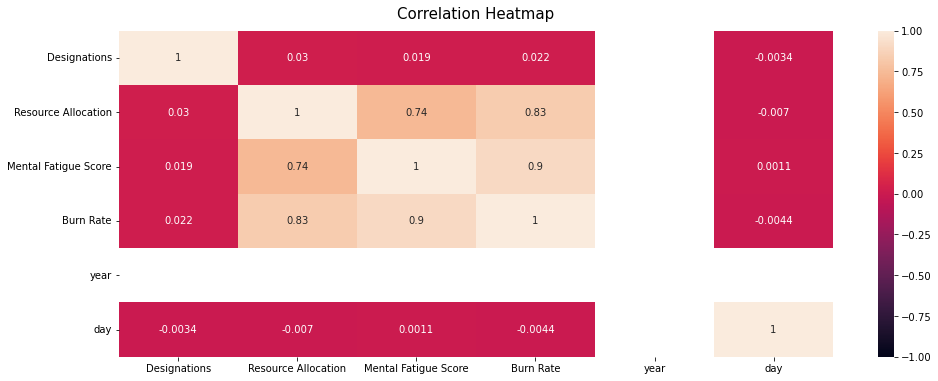

In [225]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);
plt.savefig("correlation_heatmap.png")

In [40]:
 df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Designations,-35.293234,1400.015449
Resource Allocation,0.208410,-0.328182
Mental Fatigue Score,-0.453119,0.478910
Burn Rate,0.050287,-0.256719
year,0.000000,0.000000


# Calculating Number of Days employee has been in the Company

In [28]:
Date_Today = pd.to_datetime('today')

df["Joining Date"] = pd.to_datetime(df["Joining Date"])

In [29]:
Date_Today = pd.to_datetime('today')
def No_Days_in_Company(data):
    return (Date_Today - data["Joining Date"])

df["Days_in_Company"] = df.apply(No_Days_in_Company, axis=1)
df["Days_in_Company"] = df["Days_in_Company"].dt.days



In [253]:
df

,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day,Designation,Burn Rate Segment,Days_in_Company
0,2008-09-30,Female,Service,No,2,3.000000,3.800000,16,2008,September,30,Level 2,Low Burn Rate,4968
1,2008-11-30,Male,Service,Yes,1,2.000000,5.000000,36,2008,November,30,Level 1,Medium Burn Rate,4907
2,2008-03-10,Female,Product,Yes,2,4.483831,5.800000,49,2008,March,10,Level 2,Medium Burn Rate,5172
3,2008-11-03,Male,Service,Yes,1,1.000000,2.600000,20,2008,November,3,Level 1,Low Burn Rate,4934
4,2008-07-24,Female,Service,No,3,7.000000,6.900000,52,2008,July,24,Level 3,Medium Burn Rate,5036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,3,3.000000,5.729851,41,2008,December,30,Level 3,Medium Burn Rate,4877
22746,2008-01-19,Female,Product,Yes,3,6.000000,6.700000,59,2008,January,19,Level 3,Medium Burn Rate,5223
22747,2008-11-05,Male,Service,Yes,3,7.000000,5.729851,72,2008,November,5,Level 3,High Burn Rate,4932
22748,2008-01-10,Female,Service,No,3,5.000000,5.900000,52,2008,January,10,Level 3,Medium Burn Rate,5232


In [44]:
df.describe()

,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,Days_in_Company
count,21606.000000,21606.000000,21606.000000,21606.000000,21606.0,21606.000000
mean,2.998149,4.483816,5.730170,45.151301,2008.0,5057.618578
std,0.060823,1.987099,1.832461,19.816663,0.0,105.393124
min,0.000000,1.000000,0.000000,0.000000,2008.0,4875.000000
25%,3.000000,3.000000,4.700000,31.000000,2008.0,4967.000000
50%,3.000000,4.483831,5.729851,45.000000,2008.0,5057.000000
75%,3.000000,6.000000,6.900000,59.000000,2008.0,5150.000000
max,4.000000,10.000000,10.000000,100.000000,2008.0,5240.000000


In [45]:
df.columns

Index(['Joining Date', 'Gender', 'Industry', 'WFH Available', 'Designations',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate', 'year',
       'month', 'Designation', 'Burn Rate Segment', 'Days_in_Company'],
      dtype='object')

# Univariate Analysis

# What is the distribution of Gender in data set?

In [46]:
 
 df["Gender"].value_counts() 


Female    11334
Male      10272
Name: Gender, dtype: int64

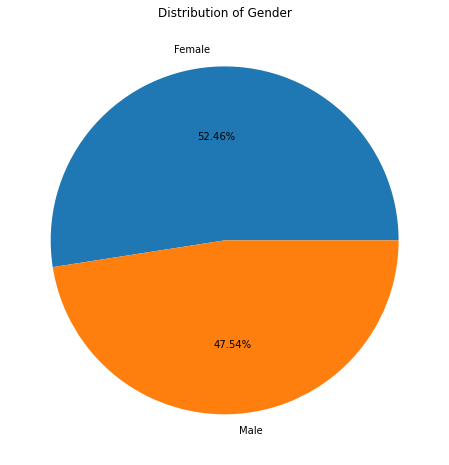

In [47]:
#Pie chart
plt.figure(figsize=(8,8))
plt.pie(x=df['Gender'].value_counts(),labels=df['Gender'].value_counts().index, autopct='%0.2f%%')
plt.title("Distribution of Gender")
plt.show()



# What are the different types of industry in our dataset?

In [48]:
 df["Industry"].value_counts() 

Service    14109
Product     7497
Name: Industry, dtype: int64

<AxesSubplot:xlabel='Industry', ylabel='count'>

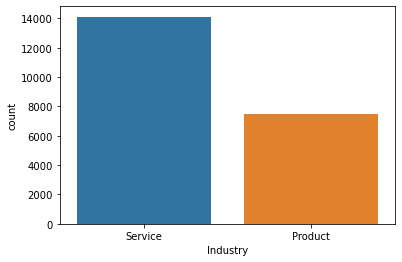

In [49]:
sns.countplot(df['Industry'])

# Availability of work from home for workers 

In [50]:
 df["WFH Available"].value_counts() 

Yes    11678
No      9928
Name: WFH Available, dtype: int64

<AxesSubplot:xlabel='WFH Available', ylabel='count'>

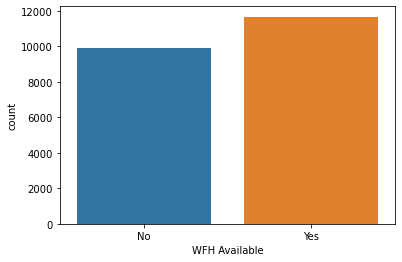

In [51]:
sns.countplot(df['WFH Available'])

# What are the different types of designation working in the industry?

In [52]:
 df["Designation"].value_counts() 

Level 3    21580
Level 2       12
Level 1       10
Level 0        3
Level 4        1
Name: Designation, dtype: int64

<AxesSubplot:xlabel='Designation', ylabel='count'>

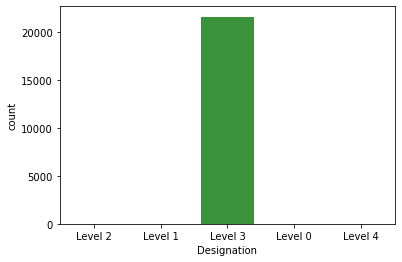

In [53]:
sns.countplot(df['Designation'])


# Univariate analysis of numerical variables

# what is the distribution of resource allocation to employees?

In [54]:
df["Resource Allocation"].describe()

count    21606.000000
mean         4.483816
std          1.987099
min          1.000000
25%          3.000000
50%          4.483831
75%          6.000000
max         10.000000
Name: Resource Allocation, dtype: float64

<AxesSubplot:ylabel='Resource Allocation'>

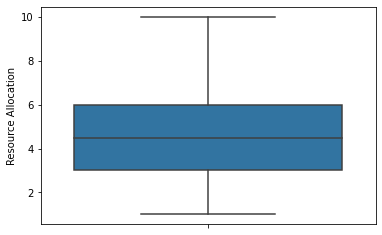

In [55]:
sns.boxplot( y=df['Resource Allocation'] )

# How is mental fatigue score of each employee distributed in the dataset?

[Text(0.5, 1.0, 'Mental Fatique Score of Each Employee')]

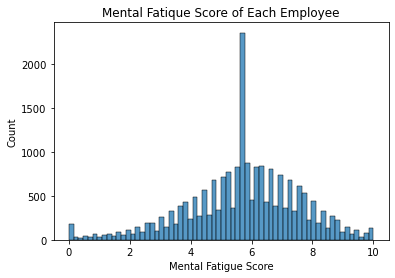

In [56]:
sns.histplot(data=df, x='Mental Fatigue Score').set(title='Mental Fatique Score of Each Employee')

# what is the distribution of burn rate to employees?

In [57]:
df["Burn Rate"].describe()

count    21606.000000
mean        45.151301
std         19.816663
min          0.000000
25%         31.000000
50%         45.000000
75%         59.000000
max        100.000000
Name: Burn Rate, dtype: float64

<AxesSubplot:ylabel='Burn Rate'>

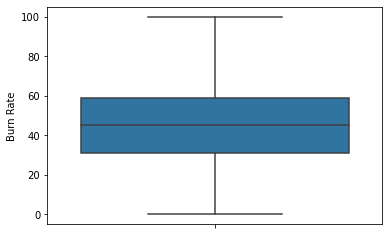

In [58]:
sns.boxplot( y=df['Burn Rate'] )

[Text(0.5, 1.0, 'Burn Rate Distribution of Employees')]

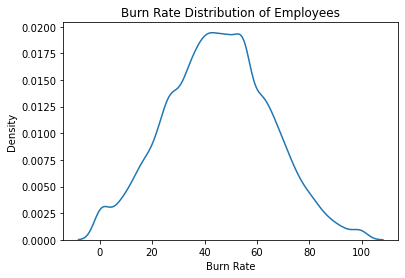

In [59]:
sns.kdeplot(data=df,x='Burn Rate') .set(title='Burn Rate Distribution of Employees')

# Bivariate Analysis

# Is there any association between Resource allocation and Burn Rate 

In [60]:
resourceburn=df.loc[:,[ 'Resource Allocation',  'Burn Rate']]

In [61]:
resourceburn

,Resource Allocation,Burn Rate
0,3.000000,16
1,2.000000,36
2,4.483831,49
3,1.000000,20
4,7.000000,52
...,...,...
22745,3.000000,41
22746,6.000000,59
22747,7.000000,72
22748,5.000000,52


In [62]:
resourceburn.corr()

,Resource Allocation,Burn Rate
Resource Allocation,1.000000,0.830756
Burn Rate,0.830756,1.000000


In [63]:
X = resourceburn.drop(['Burn Rate'],axis=1) #X needs to be a DataFrame or 2D array
y = resourceburn['Burn Rate']#y needs to be a Series or 1D array


In [64]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:              Burn Rate   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                 4.812e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        13:42:34   Log-Likelihood:                -82526.
No. Observations:               21606   AIC:                         1.651e+05
Df Residuals:                   21604   BIC:                         1.651e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.0036    

# since p-value is 0.000 and less than 5% you can reject null hypothese and conclude there is linear relationship between Resource Allocation and Burn Rate at 5% significant level



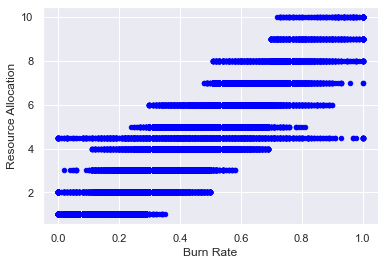

In [302]:
dk.plot(kind='scatter',x='Burn Rate',y='Resource Allocation',color='blue')
plt.show()


# Is there any relation between Resource Allocation and Mental Fatigue Score

In [67]:
resourcefatigue=df.loc[:,[ 'Resource Allocation',  'Mental Fatigue Score']]

In [68]:
resourcefatigue.corr()

,Resource Allocation,Mental Fatigue Score
Resource Allocation,1.000000,0.741454
Mental Fatigue Score,0.741454,1.000000


In [69]:
X = resourcefatigue.drop(['Mental Fatigue Score'],axis=1) #X needs to be a DataFrame or 2D array
y = resourcefatigue['Mental Fatigue Score']#y needs to be a Series or 1D array

In [70]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())


                             OLS Regression Results                             
Dep. Variable:     Mental Fatigue Score   R-squared:                       0.550
Model:                              OLS   Adj. R-squared:                  0.550
Method:                   Least Squares   F-statistic:                 2.638e+04
Date:                  Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                          13:42:55   Log-Likelihood:                -35123.
No. Observations:                 21606   AIC:                         7.025e+04
Df Residuals:                     21604   BIC:                         7.027e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

# since p-value is 0.000 and less than 5% you can reject null hypothese and conclude there is linear relationship between Resource Allocation and Mental Fatigue Score at 5% significant level

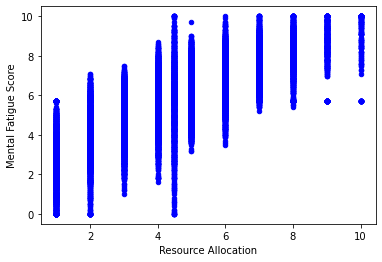

In [71]:
df.plot(kind='scatter',x='Resource Allocation',y='Mental Fatigue Score',color='blue')
plt.show()

# Is Mental Fatigue Score of each employee related to Burn Rate ?

In [196]:
resourcefatigue=df.loc[:,[ 'Mental Fatigue Score',  'Burn Rate']]

In [197]:
resourcefatigue.corr()

,Mental Fatigue Score,Burn Rate
Mental Fatigue Score,1.000000,0.899178
Burn Rate,0.899178,1.000000


In [73]:
X = resourcefatigue.drop(['Burn Rate'],axis=1) #X needs to be a DataFrame or 2D array
y = resourcefatigue['Burn Rate']#y needs to be a Series or 1D array

In [74]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())



                            OLS Regression Results                            
Dep. Variable:              Burn Rate   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 9.122e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        13:43:05   Log-Likelihood:                -77327.
No. Observations:               21606   AIC:                         1.547e+05
Df Residuals:                   21604   BIC:                         1.547e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.5684 

# Since p-value is 0.000 and less than 5% you can reject null hypothese and conclude there is linear relationship between Burn Rate and Mental Fatigue Score at 5% significant level

<Figure size 1152x1152 with 0 Axes>

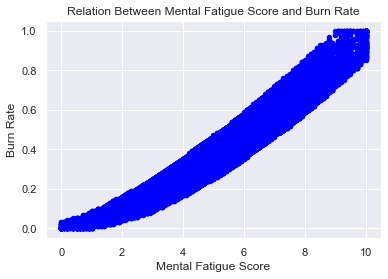

In [274]:
plt.figure(figsize=(16, 16))
dk.plot(kind='scatter',x='Mental Fatigue Score',y='Burn Rate',color='blue')
plt.title('Relation Between Mental Fatigue Score and Burn Rate')
plt.show()


In [268]:
df

,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day,Designation,Burn Rate Segment,Days_in_Company
0,2008-09-30,Female,Service,No,2,3.000000,3.800000,16,2008,September,30,Level 2,Low Burn Rate,4968
1,2008-11-30,Male,Service,Yes,1,2.000000,5.000000,36,2008,November,30,Level 1,Medium Burn Rate,4907
2,2008-03-10,Female,Product,Yes,2,4.483831,5.800000,49,2008,March,10,Level 2,Medium Burn Rate,5172
3,2008-11-03,Male,Service,Yes,1,1.000000,2.600000,20,2008,November,3,Level 1,Low Burn Rate,4934
4,2008-07-24,Female,Service,No,3,7.000000,6.900000,52,2008,July,24,Level 3,Medium Burn Rate,5036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,3,3.000000,5.729851,41,2008,December,30,Level 3,Medium Burn Rate,4877
22746,2008-01-19,Female,Product,Yes,3,6.000000,6.700000,59,2008,January,19,Level 3,Medium Burn Rate,5223
22747,2008-11-05,Male,Service,Yes,3,7.000000,5.729851,72,2008,November,5,Level 3,High Burn Rate,4932
22748,2008-01-10,Female,Service,No,3,5.000000,5.900000,52,2008,January,10,Level 3,Medium Burn Rate,5232


# Categorical Vs Categorical Analysis

# What is the distribution of female and male employees in each job level?

In [75]:
tablededgen = pd.crosstab(df['Designation'],df['Gender'],margins = True)
tablededgen


Gender,Female,Male,All
Designation,,,
Level 0,2,1,3
Level 1,3,7,10
Level 2,7,5,12
Level 3,11322,10258,21580
Level 4,0,1,1
All,11334,10272,21606


In [76]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Expected values: \n")
    print(exp_val)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    if exp_val.min()<10 : print("\n********************************************\nWarning :We have some small expected \
values\n******************************************** ")
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        


In [77]:
chi_square('Designation','Gender')

Expected values: 

[[1.57372952e+00 1.42627048e+00]
 [5.24576507e+00 4.75423493e+00]
 [6.29491808e+00 5.70508192e+00]
 [1.13203610e+04 1.02596390e+04]
 [5.24576507e-01 4.75423493e-01]]

Chi-square is : 3.535134076191368 

p_value is : 0.4725562793302892 

degree of freedom is :4

********************************************
******************************************** 


# Since p value >5% accept null hypothesis and conclude there is no statistical relation ship between Designation and Gender

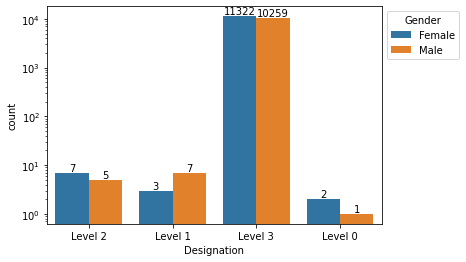

In [119]:
# plot and add annotations
p = sns.countplot(data=df, x='Designation', hue='Gender')
p.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
p.set_yscale("log")
for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

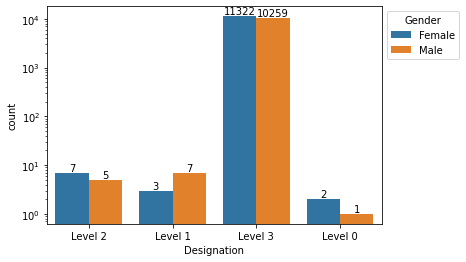

In [118]:
# plot and add annotations
p = sns.countplot(data=df, x='Designation', hue='Gender',)
p.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
p.set_yscale("log")
for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

In [ ]:
g = sns.barplot(x=xs, y=ys, hue=hue)
g.set_yscale("log")

# Designation Vs Industry

In [80]:
tabledesin = pd.crosstab(df['Designation'],df['Industry'],margins = True)
tabledesin

Industry,Product,Service,All
Designation,,,
Level 0,1,2,3
Level 1,3,7,10
Level 2,5,7,12
Level 3,7487,14093,21580
Level 4,1,0,1
All,7497,14109,21606


In [81]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Expected values: \n")
    print(exp_val)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    if exp_val.min()<10 : print("\n********************************************\nWarning :We have some small expected \
values\n******************************************** ")
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        


In [82]:
chi_square('Designation','Industry')

Expected values: 

[[1.04096084e+00 1.95903916e+00]
 [3.46986948e+00 6.53013052e+00]
 [4.16384338e+00 7.83615662e+00]
 [7.48797834e+03 1.40920217e+04]
 [3.46986948e-01 6.53013052e-01]]

Chi-square is : 2.2391864530726133 

p_value is : 0.6918618164345434 

degree of freedom is :4

********************************************
******************************************** 


# Since p value >5% accept null hypothesis and conclude there is no statistical relation ship between Designation and Industry

<AxesSubplot:xlabel='Designation'>

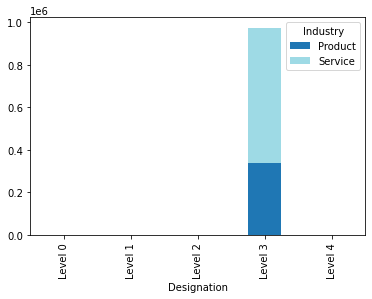

In [83]:
df_pivot = pd.pivot_table(df, index='Designation', columns='Industry', values='Burn Rate', aggfunc='sum')
df_pivot.plot.bar(stacked=True, colormap='tab20')

# Designation Vs WFH Availablity

In [84]:
tabledeswfh = pd.crosstab(df['Designation'],df['WFH Available'],margins = True)
tabledeswfh

WFH Available,No,Yes,All
Designation,,,
Level 0,1,2,3
Level 1,2,8,10
Level 2,5,7,12
Level 3,9919,11661,21580
Level 4,1,0,1
All,9928,11678,21606


In [85]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Expected values: \n")
    print(exp_val)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    if exp_val.min()<10 : print("\n********************************************\nWarning :We have some small expected \
values\n******************************************** ")
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        


In [86]:
chi_square('Designation','WFH Available')

Expected values: 

[[1.37850597e+00 1.62149403e+00]
 [4.59501990e+00 5.40498010e+00]
 [5.51402388e+00 6.48597612e+00]
 [9.91605295e+03 1.16639471e+04]
 [4.59501990e-01 5.40498010e-01]]

Chi-square is : 4.170267871281823 

p_value is : 0.3834527534354617 

degree of freedom is :4

********************************************
******************************************** 


# Since p value >5% accept null hypothesis and conclude there is no statistical relation ship between Designation and WFH Availiability

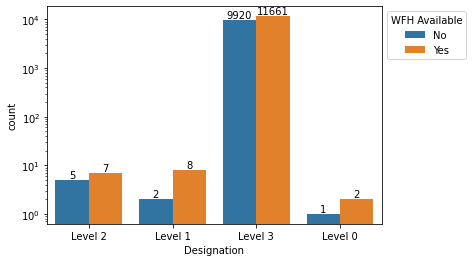

In [120]:
# plot and add annotations
p = sns.countplot(data=df, x='Designation', hue='WFH Available')
p.legend(title='WFH Available', bbox_to_anchor=(1, 1), loc='upper left')
p.set_yscale("log")
for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

# What is the distribution of female and male employees in different type of industry?


In [88]:
tablegenind = pd.crosstab(df['Gender'],df['Industry'],margins = True)
tablegenind 

Industry,Product,Service,All
Gender,,,
Female,3873,7461,11334
Male,3624,6648,10272
All,7497,14109,21606


In [89]:
chi_square('Gender','Industry')

Expected values: 

[[3932.75006943 7401.24993057]
 [3564.24993057 6707.75006943]]

Chi-square is : 2.8752716287444207 

p_value is : 0.08994979653846542 

degree of freedom is :1

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Gender and Industry


# Since p value >5% accept null hypothesis and conclude there is no statistical relation ship between Gender and Industry

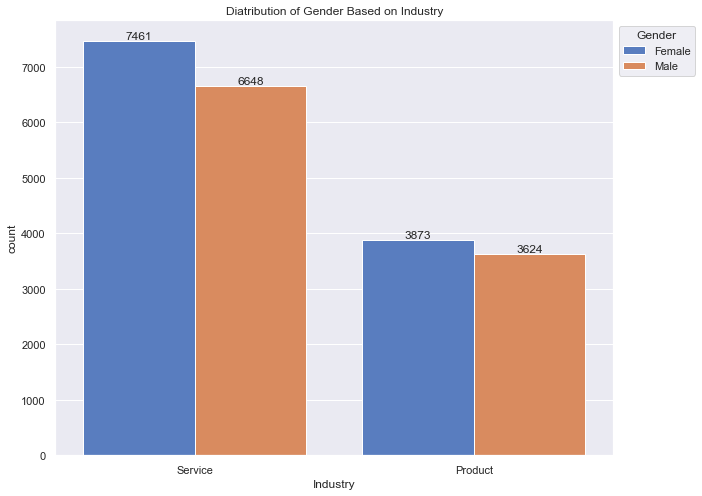

In [281]:
# plot and add annotations
plt.figure(figsize=(10, 8))
p = sns.countplot(data=df, x='Industry', hue='Gender',palette="muted")
p.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Diatribution of Gender Based on Industry')
for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

# Gender Vs WFH Availability

In [91]:
tablegenwfh = pd.crosstab(df['Gender'],df['WFH Available'],margins = True)
tablegenwfh 

WFH Available,No,Yes,All
Gender,,,
Female,4811,6523,11334
Male,5117,5155,10272
All,9928,11678,21606


In [92]:
chi_square('Gender','WFH Available')

Expected values: 

[[5207.99555679 6126.00444321]
 [4720.00444321 5551.99555679]]

Chi-square is : 117.47117332846715 

p_value is : 2.2636629379549866e-27 

degree of freedom is :1

There is statistiacally significant correlation between Gender and WFH Available at 0.05 significant level


# Since p value <5% reject null hypothesis and conclude There is statistiacally significant correlation between Gender and WFH Availablity at 0.05 significant level

<AxesSubplot:xlabel='Gender'>

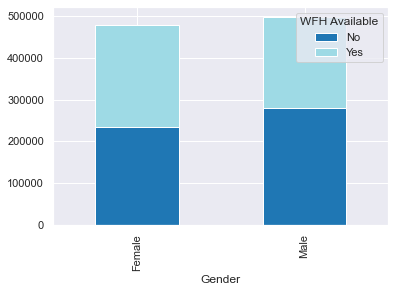

In [283]:
df_pivot = pd.pivot_table(df, index='Gender', columns='WFH Available', values='Burn Rate', aggfunc='sum')
df_pivot.plot.bar(stacked=True, colormap='tab20')

# Which type of industry provide more work from home option for their employees? 

In [94]:
tableinwfh = pd.crosstab(df['Industry'],df['WFH Available'],margins = True)
tableinwfh 

WFH Available,No,Yes,All
Industry,,,
Product,3462,4035,7497
Service,6466,7643,14109
All,9928,11678,21606


In [90]:
chi_square('Industry','WFH Available')

Expected values: 

[[3226.93058835 3800.06941165]
 [6108.06941165 7192.93058835]]

Chi-square is : 0.005781846217908308 

p_value is : 0.9393885062788809 

degree of freedom is :1

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Industry and WFH Available


# Since P value >0.05 ,There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Industry and WFH Availablity

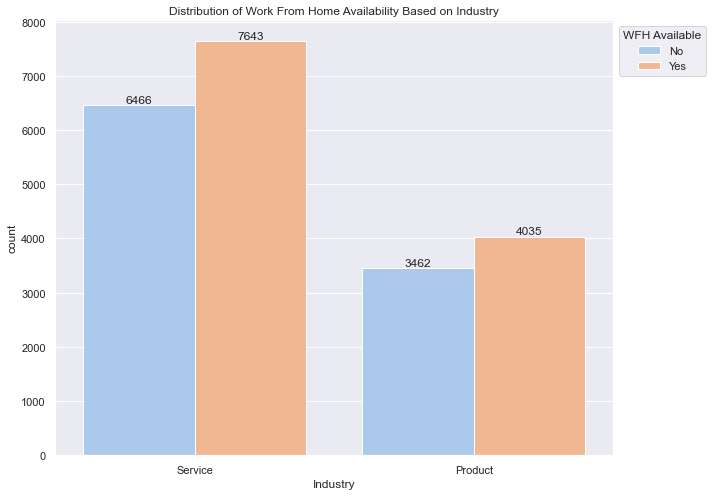

In [290]:
# plot and add annotations
plt.figure(figsize=(10, 8))
p = sns.countplot(data=df, x='Industry', hue='WFH Available')
p.legend(title='WFH Available', bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Distribution of Work From Home Availability Based on Industry')
for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

# Continous Vs Categorical

# How does work from home affect burn rate of employees?

# summarization

In [96]:
df.groupby(['WFH Available']).agg({'Burn Rate':'mean'})

,Burn Rate
WFH Available,
No,51.719682
Yes,39.567220


In [97]:
df.groupby(['WFH Available']).agg({'Burn Rate':'describe'})

Burn Rate                                                    
                  count       mean        std  min   25%   50%   75%    max
WFH Available                                                              
No               9928.0  51.719682  19.601554  0.0  39.0  54.0  65.0  100.0
Yes             11678.0  39.567220  18.222956  0.0  28.0  39.0  49.0  100.0

# Subsetting Data
Splitting categorical variable ( WFH Available) in to 2 levels(Available and Not_Available) and creating two different datasets 


In [101]:
Available=df[(df['WFH Available']=='Yes')]
Not_Available=df[(df['WFH Available']=='No')]

# Checking Assumptions

#Now checking for assumptions before proceeding 


Assumption 1: Are the two samples independent?
Assumption 2: No extreme outliers
Assumption 3: Are the data from each of the 2 groups following a normal distribution?
Assumption 4: Do the two samples have the same variances (Homogeneity of Variance)?


# Assumption 1
first check if two groups are independent  
just check by seeing the groups WFH Available and WFH Not_Available

In [ ]:
they are independant variables 

# Assumption 2
Check if two groups have any extreme outliers(this is done by plotting a grouped box plot of categorical and continous variables we are comparing)


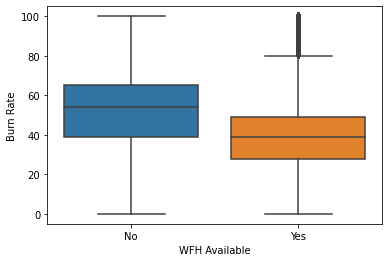

In [99]:
ax = sns.boxplot(x='WFH Available', y='Burn Rate', data=df)

In [103]:
df.dtypes

Joining Date            datetime64[ns]
Gender                          object
Industry                        object
WFH Available                   object
Designations                     int64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                        int64
year                             int64
month                           object
Designation                     object
Burn Rate Segment               object
Days_in_Company                  int64
dtype: object

In [ ]:
Here they dont have any extreme outliers 

# Assumption 3

We check normality by doing normality tests 
Some of the commonly used normality tests are shapiro-wilk, de agostino,Anderson Darling, kolmogrov-smirnov test

We can also rely on central limit theorem if sample size is large enough (n>30)

 Else check for normality using shapiro wilk test for both the subsetted groups separately


In [113]:
import scipy.stats as stats

stats.shapiro(Available['Burn Rate'])

ShapiroResult(statistic=0.9902606010437012, pvalue=1.881988889741069e-27)

In [114]:
stats.shapiro(Not_Available['Burn Rate'])

ShapiroResult(statistic=0.9873746633529663, pvalue=9.096341062889017e-29)

Here for both groups p value< 5% hence we reject null hypothesis and data is not normally distributed.
But as our sample size is greater than 30 we assume data to be normally distributed based on central limit theorem

# Assumption 4

Checking the homogeneaty or equality of variance between two groups
Here i am using Levenes test to test if two groups have equality of variance 

In [107]:
stats.levene(Available["Burn Rate"], Not_Available["Burn Rate"])

LeveneResult(statistic=39.66981924140991, pvalue=3.065353149740305e-10)

# As the data is independent, assumed to be normal but dont have equal variance we will go for Welch t test 

In [108]:
stats.ttest_ind(Available["Burn Rate"], Not_Available["Burn Rate"], equal_var=False)

Ttest_indResult(statistic=-46.90120471391753, pvalue=0.0)

In [139]:
alpha = 0.05
statistic , p_value = stats.ttest_ind(Available['Burn Rate'],Not_Available['Burn Rate'])
if p_value > alpha:
    print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


Text(0.5, 1.0, 'Relation Between Work From Home Availabily and Burn Rate')

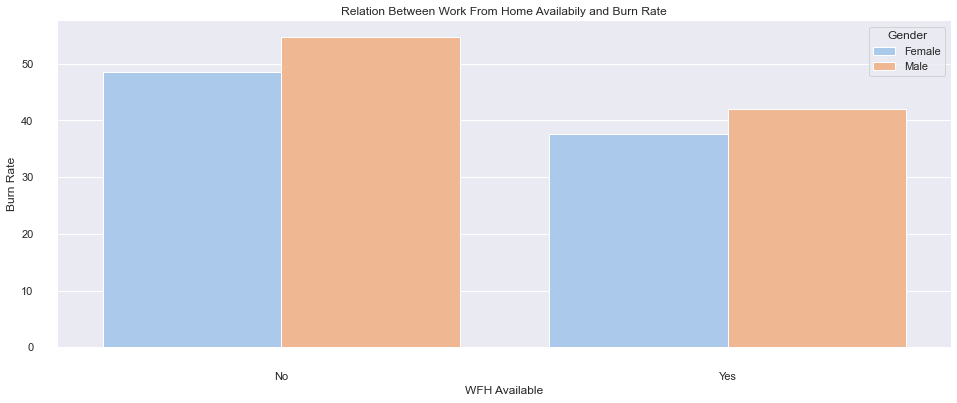

In [232]:

plt.figure(figsize=(16, 6))
sns.set_theme( palette="pastel")
sns.barplot(x="WFH Available", y="Burn Rate",
            hue="Gender", 
            data=df,ci=None)
sns.despine(offset=15, trim=True)
plt.title('Relation Between Work From Home Availabily and Burn Rate')

# WFH Availability Vs Mental Fatigue Score

In [ ]:
Available=df[(df['WFH Available']=='Yes')]
Not_Available=df[(df['WFH Available']=='No')]

# Assumption 1
first check if two groups are independent
just check by seeing the groups WFH Available and WFH Not_Available

In [ ]:
they are independant variables 

# Assumption 2
Check if two groups have any extreme outliers(this is done by plotting a grouped box plot of categorical and continous variables we are comparing)

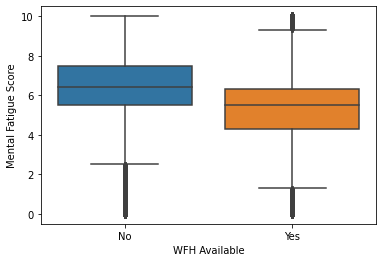

In [140]:
ax = sns.boxplot(x='WFH Available', y='Mental Fatigue Score', data=df)

In [ ]:
Here they dont have any extreme outliers 

# Assumption 3
We check normality by doing normality tests Some of the commonly used normality tests are shapiro-wilk, de agostino,Anderson Darling, kolmogrov-smirnov test

We can also rely on central limit theorem if sample size is large enough (n>30)

Else check for normality using shapiro wilk test for both the subsetted groups separately

In [104]:
import scipy.stats as stats

stats.shapiro(Available['Mental Fatigue Score'])


ShapiroResult(statistic=0.9822758436203003, pvalue=1.2862719225136036e-35)

In [105]:
stats.shapiro(Not_Available['Mental Fatigue Score'])

ShapiroResult(statistic=0.969451367855072, pvalue=1.9698052513013954e-41)

Here for both groups p value< 5% hence we reject null hypothesis and data is not normally distributed.
But as our sample size is greater than 30 we assume data to be normally distributed based on central limit theorem

# Assumption 4
Checking the homogeneaty or equality of variance between two groups Here i am using Levenes test to test if two groups have equality of variance

In [146]:
stats.levene(Available["Mental Fatigue Score"], Not_Available["Mental Fatigue Score"])

LeveneResult(statistic=8.087017317644577, pvalue=0.0044627957230387975)

In [ ]:
p value< 5% hence we reject null hypothesis the data does not have equal variance

# T Test for test of independancy

In [147]:
stats.ttest_ind(Available["Mental Fatigue Score"], Not_Available["Mental Fatigue Score"], equal_var=False)

Ttest_indResult(statistic=-39.175509286169614, pvalue=0.0)

In [148]:
alpha = 0.05
statistic , p_value = stats.ttest_ind(Available['Burn Rate'],Not_Available['Burn Rate'])
if p_value > alpha:
    print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


# WFH Availability Vs Resource Allocation

# Assumption 1
first check if two groups are independent just check by seeing the groups WFH Available and WFH Not_Available

In [ ]:
Two group are independant 

# Assumption 2
Check if two groups have any extreme outliers(this is done by plotting a grouped box plot of categorical and continous variables we are comparing)

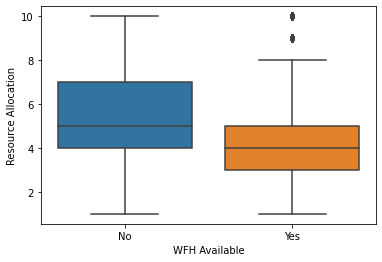

In [149]:
ax = sns.boxplot(x='WFH Available', y='Resource Allocation', data=df)

There is no extreme outliers

# Assumption 3
We check normality by doing normality tests Some of the commonly used normality tests are shapiro-wilk, de agostino,Anderson Darling, kolmogrov-smirnov test

We can also rely on central limit theorem if sample size is large enough (n>30)

Else check for normality using shapiro wilk test for both the subsetted groups separately

In [150]:
import scipy.stats as stats

stats.shapiro(Available['Resource Allocation'])


ShapiroResult(statistic=0.9533918499946594, pvalue=0.0)

In [151]:
stats.shapiro(Not_Available['Resource Allocation'])

ShapiroResult(statistic=0.9693765640258789, pvalue=1.6478989680766984e-40)

Here for both groups p value< 5% hence we reject null hypothesis and data is not normally distributed.
But as our sample size is greater than 30 we assume data to be normally distributed based on central limit theorem

# Assumption 4
Checking the homogeneaty or equality of variance between two groups Here i am using Levenes test to test if two groups have equality of variance

In [152]:
stats.levene(Available["Resource Allocation"], Not_Available["Resource Allocation"])

LeveneResult(statistic=63.8033646558152, pvalue=1.4474729064800757e-15)

p value< 5% hence we reject null hypothesis the data does not have equal variance

# T Test for test of independancy

In [153]:
stats.ttest_ind(Available["Resource Allocation"], Not_Available["Resource Allocation"], equal_var=False)

Ttest_indResult(statistic=-42.26413257178668, pvalue=0.0)

In [154]:
alpha = 0.05
statistic , p_value = stats.ttest_ind(Available['Burn Rate'],Not_Available['Burn Rate'])
if p_value > alpha:
    print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
    print('Reject Null Hypothesis')

Reject Null Hypothesis


# Industry Vs Resource Allocation

In [111]:
Service=df[(df['Industry']=='Service')]
Product=df[(df['Industry']=='Product')]

# Assumption 1
first check if two groups are independent just check by seeing the groups WFH Available and WFH Not_Available

In [ ]:
Groups are independant

# Assumption 2
Check if two groups have any extreme outliers(this is done by plotting a grouped box plot of categorical and continous variables we are comparing)

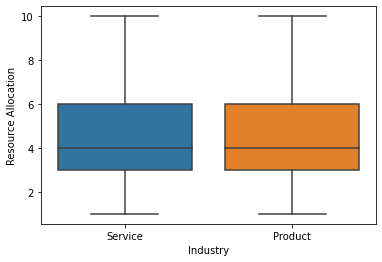

In [157]:
ax = sns.boxplot(x='Industry', y='Resource Allocation', data=df)

In [ ]:
No extreme outliers 

# Assumption 3
We check normality by doing normality tests Some of the commonly used normality tests are shapiro-wilk, de agostino,Anderson Darling, kolmogrov-smirnov test

We can also rely on central limit theorem if sample size is large enough (n>30)

Else check for normality using shapiro wilk test for both the subsetted groups separately

In [159]:
import scipy.stats as stats

stats.shapiro(Service['Resource Allocation'])


ShapiroResult(statistic=0.9659622311592102, pvalue=0.0)

In [160]:
stats.shapiro(Product['Resource Allocation'])

ShapiroResult(statistic=0.9652226567268372, pvalue=4.4067479191894975e-38)

Here for both groups p value< 5% hence we reject null hypothesis and data is not normally distributed.
But as our sample size is greater than 30 we assume data to be normally distributed based on central limit theorem

# Assumption 4
Checking the homogeneaty or equality of variance between two groups Here i am using Levenes test to test if two groups have equality of variance

In [162]:
stats.levene(Service["Resource Allocation"], Product["Resource Allocation"])

LeveneResult(statistic=0.16784151864003105, pvalue=0.6820416034478105)

p value> 5% hence we fail to reject null hypothesis the groups have equal variance

# T Test test of independancy

In [ ]:
As the groups are normal and have equal variance we widd do pooled t test for test of independancy

In [163]:
stats.ttest_ind(Service["Resource Allocation"], Product["Resource Allocation"], equal_var=True)

Ttest_indResult(statistic=0.9917858330092308, pvalue=0.3213138161002828)

# Here p value is > 5% hence we conclude that there no statistical relationship between the variables 

# Employees belonging to which industry suffer from more burn rate?

# Assumption 1
first check if two groups are independent just check by seeing the groups WFH Available and WFH Not_Available

In [ ]:
Two groups are Independant

# Assumption 2 - Checking For Extreme Outliers

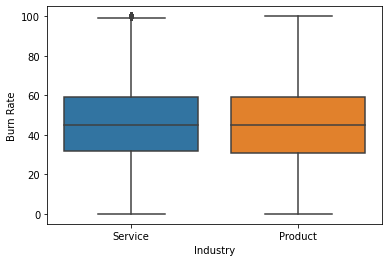

In [109]:
ax = sns.boxplot(x='Industry', y='Burn Rate', data=df)

# Assumption 3- Normality test 

In [112]:

stats.shapiro(Service['Burn Rate'])

ShapiroResult(statistic=0.9966156482696533, pvalue=1.832458008636275e-17)

In [167]:

stats.shapiro(Product['Burn Rate'])

ShapiroResult(statistic=0.9961385130882263, pvalue=1.0948439420691014e-12)

# Homogeneity of variance 

In [168]:
stats.levene(Service["Burn Rate"], Product["Burn Rate"])

LeveneResult(statistic=0.2482960077298522, pvalue=0.6182828661004491)

# Here p value is >5% hence we conclude the groups have equal variance 

# T test Test of independancy 

# As the groups are normal and have equal variance we will do pooled t test for test of independancy

In [169]:
stats.ttest_ind(Service["Burn Rate"], Product["Burn Rate"], equal_var=True)

Ttest_indResult(statistic=1.1948597996463575, pvalue=0.23215575324138987)

# Here p value is > 5% hence we conclude that there no statistical relationship between the variables

Text(0.5, 1.0, 'Relation Between Industry and Burn Rate')

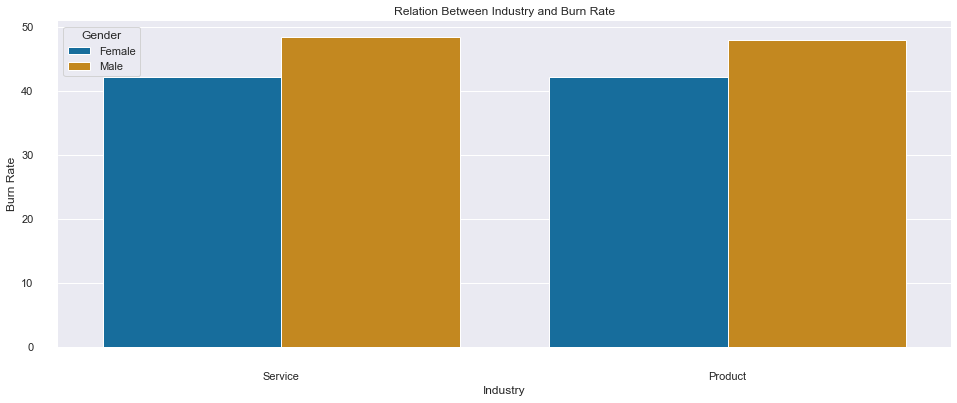

In [245]:
plt.figure(figsize=(16, 6))
sns.set_theme( palette="pastel")
sns.barplot(x="Industry", y="Burn Rate",
            hue="Gender", 
            data=df,ci=None,palette='colorblind')
sns.despine(offset=15, trim=True)
plt.title('Relation Between Industry and Burn Rate')


# Industry Vs Mental Fatigue 

# Assumption 1 

#  Assumption 2 . Checking for extreme outliers

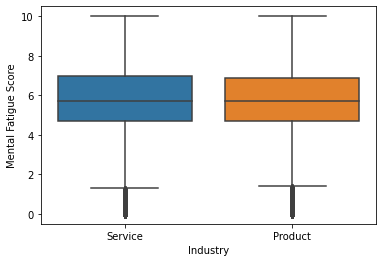

In [170]:
ax = sns.boxplot(x='Industry', y='Mental Fatigue Score', data=df)

# Assumption 3 . Checking Normality 

In [171]:

stats.shapiro(Service['Mental Fatigue Score'])

ShapiroResult(statistic=0.9836646914482117, pvalue=2.846793837372888e-36)

In [173]:
stats.shapiro(Product['Mental Fatigue Score'])

ShapiroResult(statistic=0.9805525541305542, pvalue=6.035665081867698e-30)

# Assumption 4. Checking Homogenity of variance

In [174]:
stats.levene(Service["Mental Fatigue Score"], Product["Mental Fatigue Score"])

LeveneResult(statistic=0.109447040870288, pvalue=0.7407779622245065)

p value> 5% hence we fail to reject null hypothesis the groups have equal variance

# T test Test of independancy 

In [175]:
stats.ttest_ind(Service["Mental Fatigue Score"], Product["Mental Fatigue Score"], equal_var=True)

Ttest_indResult(statistic=0.6658399103702822, pvalue=0.505520987943967)

# Here p value is > 5% hence we conclude that there no statistical relationship between the variables

# Gender Vs Mental Fatigue 

In [177]:
Female=df[(df['Gender']=='Female')]
Male=df[(df['Gender']=='Male')]

# Assumption 1

# Assumption 2.  Checking Outliers

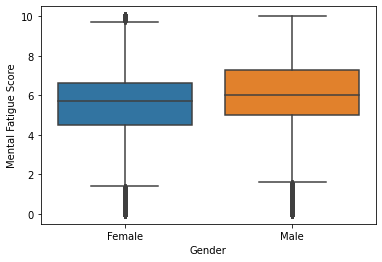

In [178]:
ax = sns.boxplot(x='Gender', y='Mental Fatigue Score', data=df)

# Assumption 3. Normality test 

In [179]:

stats.shapiro(Female['Mental Fatigue Score'])

ShapiroResult(statistic=0.9840427041053772, pvalue=7.152402641437721e-33)

In [ ]:
stats.shapiro(Male['Mental Fatigue Score'])

# Assumption 4. Homogenity of variance 

In [181]:
stats.levene(Female["Mental Fatigue Score"], Male["Mental Fatigue Score"])

LeveneResult(statistic=4.549093191637621, pvalue=0.03294813093383568)

# Test of independance - T test 
As the variable has 2 independant levels . Since the data is assumed to be normal and it does not have equal variance we go for welch T test

In [182]:
stats.ttest_ind(Female["Mental Fatigue Score"], Male["Mental Fatigue Score"], equal_var=False)

Ttest_indResult(statistic=-20.02768934509269, pvalue=2.298308427997464e-88)

# P value is <5% so there is statistical association between the variable gender and mental fatigue score

# Gender Vs Burn Rate

# Assumption 1. 

they are independant variables 

# Assumption 2. Check for extreme outliers

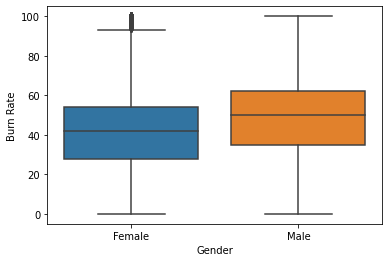

In [184]:
ax = sns.boxplot(x='Gender', y='Burn Rate', data=df)

# Assumption 3. Check for Normality

In [185]:

stats.shapiro(Female['Burn Rate'])

ShapiroResult(statistic=0.9941429495811462, pvalue=1.8518853314764694e-20)

In [186]:
stats.shapiro(Male['Burn Rate'])

ShapiroResult(statistic=0.9944714307785034, pvalue=7.8458784204175345e-19)

# p value is <5% hence data is not normally distributed . But we assume normality based on central limit theorem as sample size is >30

# Assumption 4. Homogenity of Variance

In [187]:
stats.levene(Female["Burn Rate"], Male["Burn Rate"])

LeveneResult(statistic=14.598305658044723, pvalue=0.0001334299413445632)

# T test Test of Independancy

In [189]:
stats.ttest_ind(Female["Burn Rate"], Male["Burn Rate"], equal_var=False)

Ttest_indResult(statistic=-22.284370470130952, pvalue=1.098270784003341e-108)

# P value is <5% so there is statistical association between the variable Gender and Burn Rate

# Employees belonging to which designation level experience high mental fatigue?

# Subsetting the data in to groups  

In [246]:
Level0=df[df['Designation']=='Level 0']
Level1=df[df['Designation']=='Level 1']
Level2=df[df['Designation']=='Level 2']
Level3=df[df['Designation']=='Level 3']


# Summarization

In [248]:
df.groupby(['Designation']).agg({'Mental Fatigue Score':'mean'})

,Mental Fatigue Score
Designation,
Level 0,2.900000
Level 1,5.022985
Level 2,5.554975
Level 3,5.730988


In [249]:
df.groupby(['Designation']).agg({'Mental Fatigue Score':'describe'})

Mental Fatigue Score                                          \
                           count      mean       std  min  25%       50%   
Designation                                                                
Level 0                      3.0  2.900000  1.053565  1.8  2.4  3.000000   
Level 1                     10.0  5.022985  1.315607  2.6  4.1  5.364926   
Level 2                     12.0  5.554975  1.376075  3.6  4.3  5.729851   
Level 3                  21581.0  5.730988  1.832662  0.0  4.7  5.729851   

                          
               75%   max  
Designation               
Level 0      3.450   3.9  
Level 1      5.875   6.7  
Level 2      6.625   7.6  
Level 3      6.900  10.0

# Assumption 1.

# Assumption 2. Checking Extreme outliers

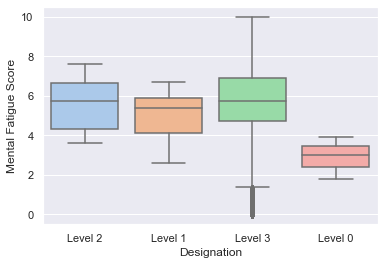

In [247]:
ax = sns.boxplot(x='Designation', y='Mental Fatigue Score', data=df)

# Assumption 3. Checking Normality

In [192]:
stats.shapiro(Level0['Mental Fatigue Score'])

ShapiroResult(statistic=0.9932432770729065, pvalue=0.8428319692611694)

In [193]:
stats.shapiro(Level1['Mental Fatigue Score'])

ShapiroResult(statistic=0.9432349801063538, pvalue=0.5895386338233948)

In [194]:
stats.shapiro(Level2['Mental Fatigue Score'])

ShapiroResult(statistic=0.9276984333992004, pvalue=0.3880422115325928)

In [195]:
stats.shapiro(Level3['Mental Fatigue Score'])

ShapiroResult(statistic=0.98263019323349, pvalue=1.6955711418330287e-43)

# Assumption 4 . Checking Homogenity of Variance

In [199]:
stats.levene(Level0["Mental Fatigue Score"], Level1["Mental Fatigue Score"],Level2["Mental Fatigue Score"],Level3["Mental Fatigue Score"],Level4["Mental Fatigue Score"])

LeveneResult(statistic=0.8394875552583233, pvalue=0.4998207928004228)

# Test of independancy - ANOVA 

# Test of Independancy - ANOVA 

as the groups are independant , normally distributed with equal variance we do oneway anova

In [200]:

stats.f_oneway(Level0["Mental Fatigue Score"], Level1["Mental Fatigue Score"],Level2["Mental Fatigue Score"],Level3["Mental Fatigue Score"],Level4["Mental Fatigue Score"])

F_onewayResult(statistic=2.846175453249922, pvalue=0.02258954210004833)

Text(0.5, 1.0, 'Relation Between Designation and Mental Fatigue Score')

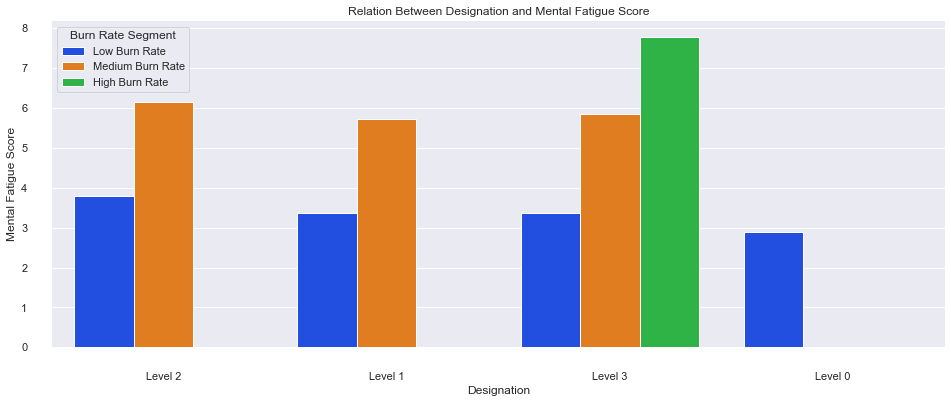

In [263]:
plt.figure(figsize=(16, 6))
sns.set_theme( palette="pastel")
sns.barplot(x="Designation", y="Mental Fatigue Score",
            hue="Burn Rate Segment", 
            data=df,ci=None,palette='bright')
sns.despine(offset=15, trim=True)
plt.title('Relation Between Designation and Mental Fatigue Score')

# P value is <5% so there is statistical association between the variable Designation and Mental Fatigue Score

# Designation Vs Burn Rate

In [216]:
df[['Designation','Burn Rate']].groupby('Designation').agg('mean')

,Burn Rate
Designation,
Level 0,16.666667
Level 1,34.300000
Level 2,40.000000
Level 3,45.181500
Level 4,81.000000


# Assumption 1.
groups are independant

# Assumption 2. Checking Extreme outliers



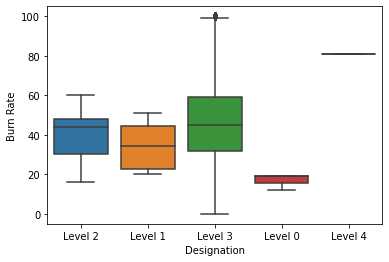

In [203]:
ax = sns.boxplot(x='Designation', y='Burn Rate', data=df)

# Assumption 3. Checking Normality

In [204]:
stats.shapiro(Level0['Burn Rate'])

ShapiroResult(statistic=0.7500000596046448, pvalue=-9.106917104872991e-07)

In [205]:
stats.shapiro(Level1['Burn Rate'])

ShapiroResult(statistic=0.9052655100822449, pvalue=0.25002649426460266)

In [206]:
stats.shapiro(Level2['Burn Rate'])

ShapiroResult(statistic=0.964308500289917, pvalue=0.8240187764167786)

In [209]:
stats.shapiro(Level3['Burn Rate'])

ShapiroResult(statistic=0.996493935585022, pvalue=2.2551926275941484e-21)

# Assumption 4 . Checking Homogenity of Variance 

In [197]:
stats.levene(Level0["Burn Rate"], Level1["Burn Rate"],Level2["Burn Rate"],Level3["Burn Rate"],Level4["Burn Rate"])

LeveneResult(statistic=2.7385287355659784, pvalue=0.027112205613445295)

# Test Of Independancy -ANOVA

As groups are independant with normal data and no equal variance we do welch ANOVA 

In [212]:
import pingouin as pg

In [214]:

pg.welch_anova(dv='Burn Rate', between='Designation', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Designation,4,11.314595,33.733183,0.000003,0.000651


In [215]:
pg.pairwise_gameshowell(dv='Burn Rate', between='Designation', data=df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Level 0,Level 1,16.666667,34.3000,-17.633333,4.369210,-4.035817,10.262687,0.015150,-2.471349
1,Level 0,Level 2,16.666667,40.0000,-23.333333,4.790985,-4.870258,11.585095,0.003149,-2.969709
2,Level 0,Level 3,16.666667,45.1815,-28.514834,2.337477,-12.198980,2.014244,0.019919,-7.043344
3,Level 0,Level 4,16.666667,81.0000,-64.333333,NaN,NaN,NaN,NaN,NaN
4,Level 1,Level 2,34.300000,40.0000,-5.700000,5.581635,-1.021206,18.903418,0.842485,-0.428349
5,Level 1,Level 3,34.300000,45.1815,-10.881500,3.696608,-2.943645,9.025548,0.092033,-0.931057
6,Level 1,Level 4,34.300000,81.0000,-46.700000,NaN,NaN,NaN,NaN,NaN
7,Level 2,Level 3,40.000000,45.1815,-5.181500,4.186699,-1.237610,10.022119,0.731542,-0.373241
8,Level 2,Level 4,40.000000,81.0000,-41.000000,NaN,NaN,NaN,NaN,NaN
9,Level 3,Level 4,45.181500,81.0000,-35.818500,NaN,NaN,NaN,NaN,NaN


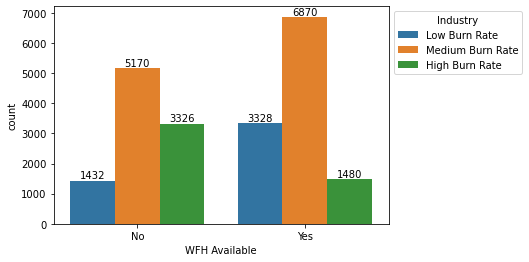

In [123]:
# plot and add annotations
p = sns.countplot(data=df, x='WFH Available', hue='Burn Rate Segment')
p.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left')

for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

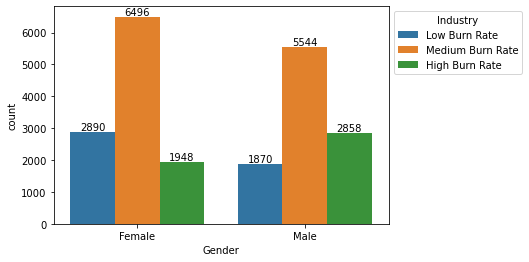

In [124]:
# plot and add annotations
p = sns.countplot(data=df, x='Gender', hue='Burn Rate Segment')
p.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left')

for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

<AxesSubplot:xlabel='Industry'>

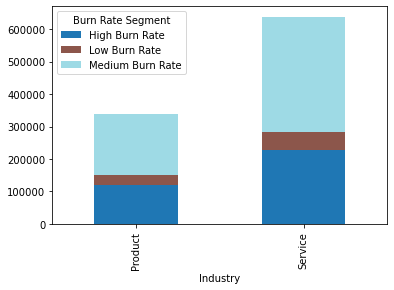

In [125]:
df_pivot = pd.pivot_table(df, index='Industry', columns='Burn Rate Segment', values='Burn Rate', aggfunc='sum')
df_pivot.plot.bar(stacked=True, colormap='tab20')

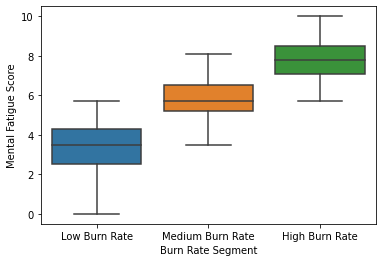

In [127]:
ax = sns.boxplot(x='Burn Rate Segment', y='Mental Fatigue Score', data=df)

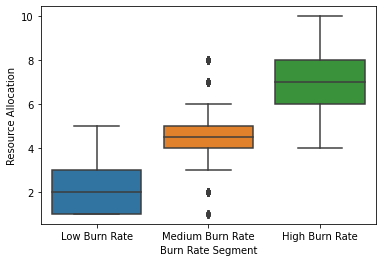

In [128]:
ax = sns.boxplot(x='Burn Rate Segment', y='Resource Allocation', data=df)

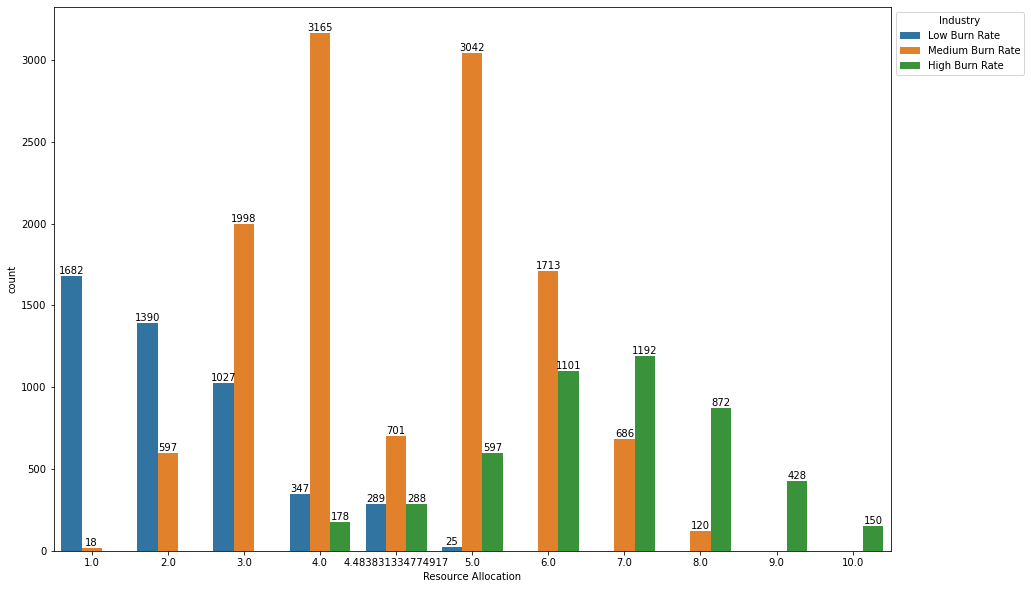

In [140]:
# plot and add annotations
plt.figure(figsize=(15, 10)) 
p = sns.countplot(data=df, x='Resource Allocation', hue='Burn Rate Segment')
p.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left')

for c in p.containers:
    # set the bar label
    p.bar_label(c, fmt='%.0f', label_type='edge')

# P value is <5% so there is statistical association between the variable Designation and Burn Rate

# Regression 

In [30]:
df

,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day,Designation,Burn Rate Segment,Days_in_Company
0,2008-09-30,Female,Service,No,2,3.000000,3.800000,16,2008,September,30,Level 2,Low Burn Rate,4969
1,2008-11-30,Male,Service,Yes,1,2.000000,5.000000,36,2008,November,30,Level 1,Medium Burn Rate,4908
2,2008-03-10,Female,Product,Yes,2,4.483831,5.800000,49,2008,March,10,Level 2,Medium Burn Rate,5173
3,2008-11-03,Male,Service,Yes,1,1.000000,2.600000,20,2008,November,3,Level 1,Low Burn Rate,4935
4,2008-07-24,Female,Service,No,3,7.000000,6.900000,52,2008,July,24,Level 3,Medium Burn Rate,5037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,3,3.000000,5.729851,41,2008,December,30,Level 3,Medium Burn Rate,4878
22746,2008-01-19,Female,Product,Yes,3,6.000000,6.700000,59,2008,January,19,Level 3,Medium Burn Rate,5224
22747,2008-11-05,Male,Service,Yes,3,7.000000,5.729851,72,2008,November,5,Level 3,High Burn Rate,4933
22748,2008-01-10,Female,Service,No,3,5.000000,5.900000,52,2008,January,10,Level 3,Medium Burn Rate,5233


In [238]:
df.Gender.value_counts()

Female    10676
Male       9652
Name: Gender, dtype: int64

In [141]:
df.value_counts('WFH Available')

WFH Available
Yes    11678
No      9928
dtype: int64

In [142]:
df.Industry.value_counts()

Service    14109
Product     7497
Name: Industry, dtype: int64

# Label encoding by mapping 

In [31]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

In [32]:
df['WFH Available']=df['WFH Available'].map({'Yes':0,'No':1})

In [33]:
df['Industry']=df['Industry'].map({'Service':0,'Product':1})

In [34]:
df

,Joining Date,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,year,month,day,Designation,Burn Rate Segment,Days_in_Company
0,2008-09-30,0,0,1,2,3.000000,3.800000,16,2008,September,30,Level 2,Low Burn Rate,4969
1,2008-11-30,1,0,0,1,2.000000,5.000000,36,2008,November,30,Level 1,Medium Burn Rate,4908
2,2008-03-10,0,1,0,2,4.483831,5.800000,49,2008,March,10,Level 2,Medium Burn Rate,5173
3,2008-11-03,1,0,0,1,1.000000,2.600000,20,2008,November,3,Level 1,Low Burn Rate,4935
4,2008-07-24,0,0,1,3,7.000000,6.900000,52,2008,July,24,Level 3,Medium Burn Rate,5037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008-12-30,0,0,1,3,3.000000,5.729851,41,2008,December,30,Level 3,Medium Burn Rate,4878
22746,2008-01-19,0,1,0,3,6.000000,6.700000,59,2008,January,19,Level 3,Medium Burn Rate,5224
22747,2008-11-05,1,0,0,3,7.000000,5.729851,72,2008,November,5,Level 3,High Burn Rate,4933
22748,2008-01-10,0,0,1,3,5.000000,5.900000,52,2008,January,10,Level 3,Medium Burn Rate,5233


In [35]:
#dropping irrelevant columns 
df.drop(['Joining Date', 'month', 
                'Designation', 'Burn Rate Segment'], axis=1, inplace=True)

In [36]:
df.drop(['year'],axis=1,inplace=True)

In [37]:
df

,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,day,Days_in_Company
0,0,0,1,2,3.000000,3.800000,16,30,4969
1,1,0,0,1,2.000000,5.000000,36,30,4908
2,0,1,0,2,4.483831,5.800000,49,10,5173
3,1,0,0,1,1.000000,2.600000,20,3,4935
4,0,0,1,3,7.000000,6.900000,52,24,5037
...,...,...,...,...,...,...,...,...,...
22745,0,0,1,3,3.000000,5.729851,41,30,4878
22746,0,1,0,3,6.000000,6.700000,59,19,5224
22747,1,0,0,3,7.000000,5.729851,72,5,4933
22748,0,0,1,3,5.000000,5.900000,52,10,5233


In [38]:
df.corr()

,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,Burn Rate,day,Days_in_Company
Gender,1.000000,0.011633,0.073829,-0.003022,0.136902,0.139132,0.154670,-0.003466,-0.000029
Industry,0.011633,1.000000,0.003339,0.001406,-0.006741,-0.002968,-0.004413,0.001535,0.002057
WFH Available,0.073829,0.003339,1.000000,0.011269,0.277234,0.263848,0.305622,-0.001836,-0.003159
Designations,-0.003022,0.001406,0.011269,1.000000,0.030204,0.018558,0.021584,-0.003352,0.000836
Resource Allocation,0.136902,-0.006741,0.277234,0.030204,1.000000,0.741454,0.830756,-0.007000,0.000703
Mental Fatigue Score,0.139132,-0.002968,0.263848,0.018558,0.741454,1.000000,0.899178,0.001125,-0.000830
Burn Rate,0.154670,-0.004413,0.305622,0.021584,0.830756,0.899178,1.000000,-0.004449,0.001254
day,-0.003466,0.001535,-0.001836,-0.003352,-0.007000,0.001125,-0.004449,1.000000,-0.092762
Days_in_Company,-0.000029,0.002057,-0.003159,0.000836,0.000703,-0.000830,0.001254,-0.092762,1.000000


In [39]:
 # Split df into X and y
y = df['Burn Rate'] 
X = df.drop('Burn Rate',axis=1)


In [40]:
X.head()

,Gender,Industry,WFH Available,Designations,Resource Allocation,Mental Fatigue Score,day,Days_in_Company
0,0,0,1,2,3.000000,3.8,30,4969
1,1,0,0,1,2.000000,5.0,30,4908
2,0,1,0,2,4.483831,5.8,10,5173
3,1,0,0,1,1.000000,2.6,3,4935
4,0,0,1,3,7.000000,6.9,24,5037


In [41]:
y.head()

0    16
1    36
2    49
3    20
4    52
Name: Burn Rate, dtype: int64

In [42]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Burn Rate   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.810e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        00:09:38   Log-Likelihood:                -73127.
No. Observations:               21606   AIC:                         1.463e+05
Df Residuals:                   21597   BIC:                         1.463e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.5421 

In [53]:
#backward feature elimination

maxp = lr.pvalues.max()
while(maxp > 0.05):
    print(f"Adjuste R-Square is {lr.rsquared_adj}")
    print(f"{lr.pvalues.idxmax()} with p-value= {maxp} was dropped\n")
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

X2.head()


                            OLS Regression Results                            
Dep. Variable:              Burn Rate   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 3.620e+04
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        00:11:45   Log-Likelihood:                -73128.
No. Observations:               21606   AIC:                         1.463e+05
Df Residuals:                   21601   BIC:                         1.463e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.3783 

,const,Gender,WFH Available,Resource Allocation,Mental Fatigue Score
0,1.0,0,1,3.000000,3.8
1,1.0,1,0,2.000000,5.0
2,1.0,0,0,4.483831,5.8
3,1.0,1,0,1.000000,2.6
4,1.0,0,1,7.000000,6.9


In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=1,test_size=0.2)


In [45]:
#step1: import classifier/Regressor
from sklearn.linear_model import LinearRegression


In [46]:
#step2: creating an instanse from that classifier/Regressor
model = LinearRegression()

In [47]:
#step3 : train the model (fit the model on train data set)
model.fit(X_train,y_train)

LinearRegression()

In [48]:
#step4:predict on test set(use the built_model for predicting for test data set)
y_pred = model.predict(X_test)

In [49]:
#step5: model evaluation
model.score(X_test,y_test)

0.8757504789443467

In [179]:
#for finding r2, mean squared error and squareeoot of mean square error 
from sklearn.metrics import r2_score,mean_squared_error
import math

In [180]:
print(r2_score(y_test,y_pred)) #R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.8758927575905171
48.34850964461695
6.953309258519784


In [169]:
R2 = r2_score(y_test,y_pred)
R2


0.8758927575905171

# LINEAR MODEL

# Burn Rate =-10.378+0.648*(Gender)+1.656*(WFH Available)+3.546*(Resource Allocation)+6.7292*(Mental Fatigue Score)

In [54]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X,y,cv=2).mean()

0.8701488874354553

In [170]:

#dimensions of data
n = len(X_test)
k = len(X_test.iloc[0])

#Adj R^2 is useful in multiple regression 
#as it accounts for number of variables in the scoring

Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)


0.8756625563525677
